Geo Data Science with Python,
Prof. Susanna Werth, VT Geosciences

---
# Exercise 8: Selecting points inside a boundary

### Content & Grading

You will receive the following points for this exercise:

- **Part A**: *10 P* - <a href='#partA'> Shapely </a>
- **Part B**: *40 P* - <a href='#partB'> Region Statistics for downloaded data </a>
- **Part C**: *30 P* - <a href='#partC'> Data Filtering & SVD </a>

Total: 
- 80 points 
- **up to 15 extra credit points for reasonaby commenting & structuring your code** 

---

### Name and Collaborator
Add your name and the name of any collaborator in the code cell below.

In [1]:
Name = 'Ntambila Daud'
Collaborators = ['None']

<div class="alert alert-warning">

**Grades:** 

Total points: **95**/80
    
- Part A: 10/10
- Part B: 40/40
- Part C: 30/30
- ExtCrd: 15/15

Excellent Job!

Signed: Susanna Werth
    
    
</div>


<div class="alert alert-warning">

**Additional Grading Notes:** 

Some more comments might be provided below for answers without full points. If there are no comments, your answer is correct.
        

    


    
    
</div>



---
---
# Part A: Find out which points locate inside a region
<a id='partA'></a>

In the code cell below, you have given x and y coordiantes of two points p1 and p2 as well as an array containing a nested list of coordinate pairs. The data are defined in a code cell below this task. You are supposed to automatically test, whether the two points lcoate inside the polygon using Python code. For that you have to convert the points and the polygonArray to shapely objects and use the correct shapely function to assing the test result to two variables `test` and `test2`. In detail, perform the following steps:

* Import the objects **Point** and **Polygon** from the package shapely.geometry in the way, that you do not need any prefix to use the objects Point and Polygon (1 point)
* Define two points `p1` and `p2` as shapely Points, given the data below (2 points)
* Convert the polygon given by the variable `polygonArray` to a list of tuples holding coordinate pairs and save them in the variable `PolygonList`. The structure of the list should be appropriate to serve as input for the shapely object Polygon in the next step. (3 points)
* Define a shapely polygon `poly1` using the coordinates stored in `PolygonList` (1 point)
* Check whether point `p1` and point `p2` locate in the polygon `poly1` and assign the test results to the variables `polytest1` and `polytest2`, respectively (2 points)

Fill your code in the answer code cell below. Make sure to comment your code well!!! Use the same variable names as stated in the task.

In [1]:
import numpy as np

# x and y coordinates of two points, given as numbers
p1_y = 24.952242
p1_x = 60.1696017
p2_y = 24.976567
p2_x = 60.1612500

# x and y coordinates of 4 points defining a polygon, given as a numpy array [y,x]
polygonArray = np.array([[24.950899, 60.169158], [24.953492, 60.169158], [24.953510,60.170104], [24.950958,60.169990]])

In [2]:

### YOUR CODE HERE
from shapely.geometry import Point, Polygon

# defining the two points p1 and p2 as shapely Point
p1 = Point(p1_y, p1_x) # defines point p1 with coordinate y,x
p2 = Point(p2_y, p2_x) # defines point p2 with coordinate y,x

# Converting the given polygonArray to a list of tuples and save them in the variable PolygonList
PolygonList = []  # initalializes PolygonList with empty
for j in range(len(polygonArray)):
    PolygonList.append(tuple(polygonArray[j,:]))


poly1 = Polygon(PolygonList)  # defines a shapely polygon poly1 using the coordinates stored in PolygonList

# Checking whether point p1 and point p2 locate in the polygon poly1
polytest1 = poly1.contains(p1) # test if p1 is within poly1 or not
polytest2 = poly1.contains(p2) # test if p2 is within poly1 or not
# Alternatively I can use "within" function
polytest1 = p1.within(poly1)
polytest2 = p2.within(poly1)

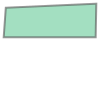

In [3]:
poly1

In [4]:
# Print out the results of your test
print('Test for point 1; p1 is {}.' .format(polytest1))
print('Test for point 2; p2 is {}.' .format(polytest2))

Test for point 1; p1 is True.
Test for point 2; p2 is False.


---
# Part B: Calculate statistics for a geographical region
<a id='partB'></a>

In this task, you should retrieve a gridded dataset and calculate mean of one of three variables (surface temperature, snowfall **or** evaporation) within the state of California and Utah, during the month of January 2021.


### You have given:

- Link to the file containing one month GLDAS NOAH model simulations from NASA's GESDISC OpenDAP server defined as url below. Note: the dataset contains only one grid, we will not do any time series analysis, only work with the spatial (lat/lon) dimensions.
- A file containing the boundary of California and Utah: boundary_CA.csv, boundary_UT.csv
- Bounding box of the study region (encompassing both regions and a buffer):
    - minLat = 28
    - maxLat = 45
    - minLon = -124
    - maxLon = -106


### You should do the following:

- Import all needed packages
- Read the boundary files for California and Utah
- Open connection to the netcdf file via pydap and with your EarthData account
- Retrieve information about either of the following variables from the GLDAS dataset: `AvgSurfT_inst`, `Snowf_tavg` or `Evap_tavg`.
- Retrieve metdadata and mappings (lat, lon, ...)
- Download the needed subset of the global dataset, covering the regions of California and Utah. **Note**: you will have to find indices that correspond to coordinates of the bounding box given above.
- Find gridpoints located inside both states using classes and methods of the module shapely, and generate a mask for each of the regions of California and Utah
- The mask should have the same shape as the downloaded datagrid its values should code 1 for gridpoints inside and 0 for gridpoints outside the region.
- Apply the mask to the grid and calculate mean variable (surface temperature, snowfall or evaporation) for both regions. Note: consider a method, that does not include points outside the mask in the mean calculation, e.g. either filter the values first, or set all gridpoints outside the region to nan and use np.nanmean().)
- Make a testplot of your masks, to see if they are correct.
- Generate a separate map of the grided dataset within the bounding box. Plot also the boundaries/polygons of both states.
- Don't forget to comment your code
- Structure your notebook section below into different work steps. Make use of the notebook markdown cells, add sections headers for different steps you are taking, or similar
- In a **mark-down cell** below your code cells, formulate a report answering the questions below.


### Answer the following questions:

- Which dataset did you choose (surface temperature, snowfall **or** evaporation) ?
- What is the fill or missing value of the dataset ?
- What is the unit of the dataset?
- How many grid points locate inside the state of California?
- How many grid points locate inside the state of Utah?
- What is the average surface temperature / snowfall / evaporation during January 2021 in California?
- What is the average surface temperature / snowfall / evaporation during January 2021 in Utah?
- Which state got more snow during that month?


In [ ]:
### ADD YOUR CODE & Documentation in cells bellow
### Create your own notebook section structure

## Importing all needed packages

In [84]:

import numpy as np
import matplotlib.pyplot as plt
import lxml
import requests
from netCDF4 import Dataset
from pydap.client import open_url
from pydap.cas.urs import setup_session
from shapely.geometry import Point, Polygon

## Reading the boundary files for California and Utah  and covert to polygon

In [66]:
#Reads the boundary files for California and Utah
boundCA = np.genfromtxt('./data/boundary_CA.csv', skip_header = 1, delimiter = ',')
boundUT = np.genfromtxt('./data/boundary_UT.csv', skip_header = 1, delimiter = ',')

# convert the California (oundCA) boundary to polygon 
PolyCA = []
for j in range(len(boundCA[:,1])):
    PolyCA.append(tuple(boundCA[j,:]))
polyCA = Polygon(PolyCA)

#convert the Utah boundary (boundUT) to polygon 
PolyUT = []
for j in range(len(boundUT[:,1])):
    PolyUT.append(tuple(boundUT[j,:]))
polyUT = Polygon(PolyUT)

## Opening connection to the netcdf file via pydap and with my EarthData account

In [39]:
url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GLDAS/GLDAS_CLSM10_M.2.1/2021/GLDAS_CLSM10_M.A202101.021.nc4'
username = 'daud80'
password = '$Imoni80'
session = setup_session(username,password,check_url=url)
dataset = open_url(url,session=session)
timeUnts = dataset.time[:].units
timeVec = dataset.time[:].data

In [6]:
dataset

<DatasetType with children 'lat', 'lon', 'time', 'time_bnds', 'Swnet_tavg', 'Lwnet_tavg', 'Qle_tavg', 'Qh_tavg', 'Qg_tavg', 'Snowf_tavg', 'Rainf_tavg', 'Evap_tavg', 'Qs_acc', 'Qsb_acc', 'Qsm_acc', 'SnowT_tavg', 'AvgSurfT_inst', 'Albedo_inst', 'SWE_inst', 'SnowDepth_inst', 'SoilMoist_S_inst', 'SoilMoist_RZ_inst', 'SoilMoist_P_inst', 'SoilTMP0_10cm_inst', 'SoilTMP10_29cm_inst', 'SoilTMP29_68cm_inst', 'SoilTMP68_144cm_inst', 'SoilTMP144_295cm_inst', 'SoilTMP295_1295cm_inst', 'ECanop_tavg', 'TVeg_tavg', 'ESoil_tavg', 'CanopInt_inst', 'ACond_tavg', 'TWS_inst', 'Wind_f_inst', 'Rainf_f_tavg', 'Tair_f_inst', 'Qair_f_inst', 'Psurf_f_inst', 'SWdown_f_tavg', 'LWdown_f_tavg'>

In [7]:
dataset.Snowf_tavg.attributes

{'units': 'kg m-2 s-1',
 'standard_name': 'snowfall_flux',
 'long_name': 'Snow precipitation rate',
 'cell_methods': 'time: mean',
 'scale_factor': 1.0,
 'add_offset': 0.0,
 'missing_value': -9999.0,
 '_FillValue': -9999.0,
 'vmin': 0.0,
 'vmax': 8.28387128e-05}

## Retrieving information about variables from the GLDAS dataset

In [102]:
# Retrieving metdadata and mappings
Snowf = dataset.Snowf_tavg.array[:].data
lon = dataset.lon[:].data
lat =  dataset.lat[:].data
fillVal = dataset.Snowf_tavg.missing_value

In [92]:
# Print the attributes and shape for lat and lon
lat = dataset.lat  # retrieve latitude
lon = dataset.lon  # retrieve longitude
print(lat.attributes) # print shape of the latitude
print(lon.shape) # print shape of the longitude

{'units': 'degrees_north', 'standard_name': 'latitude', 'long_name': 'latitude', 'scale_factor': 1.0, 'add_offset': 0.0, 'missing_value': -9999.0, '_FillValue': -9999.0, 'vmin': -59.5, 'vmax': 89.5}
(360,)


In [104]:
# Retrieving information about the data (metdadata and mappings)
AvSurfT = dataset.AvgSurfT_inst 
Snowf = dataset.Snowf_tavg  
Snowf_unit = Snowf.units # units of snow data
Evap = dataset.Evap_tavg
print(AvSurfT.attributes) # print shape of the Average surface temeperature
print(Snowf.attributes) # print shape of the Snow
print(Evap.attributes) # print shape of the Everporation

{'units': 'K', 'standard_name': 'surface_temperature', 'long_name': 'Average Surface Skin temperature', 'cell_methods': 'time: mean', 'scale_factor': 1.0, 'add_offset': 0.0, 'missing_value': -9999.0, '_FillValue': -9999.0, 'vmin': 223.751678, 'vmax': 312.357544}
{'units': 'kg m-2 s-1', 'standard_name': 'snowfall_flux', 'long_name': 'Snow precipitation rate', 'cell_methods': 'time: mean', 'scale_factor': 1.0, 'add_offset': 0.0, 'missing_value': -9999.0, '_FillValue': -9999.0, 'vmin': 0.0, 'vmax': 8.28387128e-05}
{'units': 'kg m-2 s-1', 'standard_name': 'water_evaporation_flux', 'long_name': 'Evapotranspiration', 'cell_methods': 'time: mean', 'scale_factor': 1.0, 'add_offset': 0.0, 'missing_value': -9999.0, '_FillValue': -9999.0, 'vmin': -1.2746824e-06, 'vmax': 9.153469e-05}


## Downloading the needed subset of the global datase

In [46]:
minLat = 28
maxLat = 45
minLon = -124
maxLon = -106

In [47]:
# Find out the index for the area of interest
iminLat = np.argmin(abs(lat-minLat))
imaxLat = np.argmin(abs(lat-maxLat))
iminLon = np.argmin(abs(lon-minLon))
imaxLon = np.argmin(abs(lon-maxLon))
print(iminLat,imaxLat,iminLon,imaxLon)

87 104 55 73


In [54]:
lon_sub=lon[iminLon:imaxLon]
lat_sub=lat[iminLat:imaxLat]

In [100]:
Snowf = dataset.Snowf_tavg.array[0,iminLat:imaxLat,iminLon:imaxLon].data


In [37]:
dataset.Snowf_tavg.attributes

{'units': 'kg m-2 s-1',
 'standard_name': 'snowfall_flux',
 'long_name': 'Snow precipitation rate',
 'cell_methods': 'time: mean',
 'scale_factor': 1.0,
 'add_offset': 0.0,
 'missing_value': -9999.0,
 '_FillValue': -9999.0,
 'vmin': 0.0,
 'vmax': 8.28387128e-05}

## Making a testplot of my mask

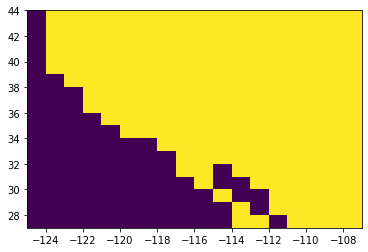

In [58]:
import matplotlib.pyplot as plt

plt.pcolormesh(lon_sub,lat_sub,Snowf[0,:,:],shading='auto')

In [62]:
lonGrid,latGrid = np.meshgrid(lon_sub,lat_sub)
Snowf[Snowf==fillVal] = np.nan # fill he missing value of snow with nan
Snowf_day = Snowf*60*60*24  # convert unit from kg m-2 s-1 to kg m-2 d-1

In [72]:
#Finding gridpoints located inside both states using classes and methods of the module shapely
# and generate a mask for each of the regions of California and Utah
CAmask = np.zeros(Snowf_day.shape[1:])
UTmask = np.zeros(Snowf_day.shape[1:])

for i in range(len(lon_sub)):
    for j in range(len(lat_sub)):
        
        curr_point = Point(lat_sub[j],lon_sub[i])
        CAmask[j,i] = int(curr_point.within(polyCA))
        UTmask[j,i] = int(curr_point.within(polyUT))
        
mask_CA_UT = CAmask + UTmask   # combing the masked snow for both California and Utah
mask_CA_UT[mask_CA_UT==0] = np.nan # converts the 0 position or false to nans

In [73]:
# Apply the mask to the grid and calculate mean variable (surface temperature, snowfall or evaporation) for both region
CAmask[CAmask==0] = np.nan
CA_Snow = Snowf_day[0]*CAmask 
CA_mean_Snow = np.nanmean(CA_Snow)  # mean Snow for  California
                          
UTmask[UTmask==0] = np.nan
UT_Snow = Snowf_day[0]*UTmask 
UT_mean_Snow = np.nanmean(UT_Snow)  # mean Snow for  Utah                     
                          
print('The mean Snow for California and Utah are {} kg m-2 d-1 and {} kg m-2 d-1 respectively.' .format(round(CA_mean_Snow,3),round(UT_mean_Snow,3)))


The mean Snow for California and Utah are 0.522 kg m-2 d-1 and 0.711 kg m-2 d-1 respectively.


## Generating a separate map of the grided dataset within the bounding box

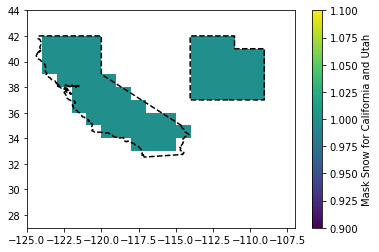

In [74]:
# Ploting for boundary for California and Utah
plt.pcolormesh(lonGrid,latGrid,mask_CA_UT,shading='auto')

plt.plot(boundCA[:,1],boundCA[:,0], 'k--') # ploting boundary for California
plt.plot(boundUT[:,1],boundUT[:,0], 'k--') # ploting boundary for Utah 

# colobar and label
cbar = plt.colorbar()
cbar.set_label('Mask Snow for California and Utah')

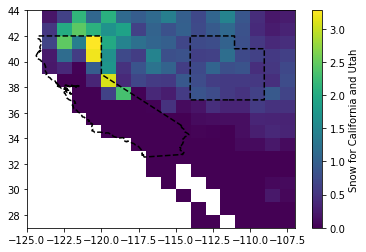

In [76]:
# Generating a separate map of the grided dataset within the bounding box. 
# Ploting also the boundaries or polygons of both states.
plt.pcolormesh(lonGrid,latGrid,Snowf_day[0],shading='auto')
plt.plot(boundCA[:,1],boundCA[:,0], 'k--') # ploting boundary for California
plt.plot(boundUT[:,1],boundUT[:,0], 'k--') # ploting boundary for Utah 
cbar = plt.colorbar()
cbar.set_label('Snow for California and Utah')

#### Add your report of results in this markdown cell


### Discussions

 1. Which dataset did you choose (surface temperature, snowfall or evaporation) ?

In [87]:
print('My choice is the {} (Snowf_tavg) dataset.' .format(Snowf.long_name))  

My choice is the Snow precipitation rate (Snowf_tavg) dataset.


2. What is the fill or missing value of the dataset ?

In [93]:
print('The fill or missing value of the dataset is {}.' .format(fillVal))

The fill or missing value of the dataset is -9999.0.


3. What is the unit of the dataset?

In [105]:
print ('The units for Snow is {}.' .format(Snowf_unit))

The units for Snow is kg m-2 s-1.


4. How many grid points locate inside the state of California?

In [106]:
print('The number of grid points located inside the state of California are {}.' .format(np.count_nonzero(~np.isnan(CA_Snow))))

The number of grid points located inside the state of California are 40.


5. How many grid points locate inside the state of Utah?

In [107]:
print('The number of grid points located inside the state of Utah are {}.' .format(np.count_nonzero(~np.isnan(UT_Snow))))

The number of grid points located inside the state of Utah are 23.


6. What is the average surface temperature / snowfall / evaporation during January 2021 in California?

In [109]:
print('The average snowfall during January 2021 in California is {} kg m-2 d-1.' .format(round(CA_mean_Snow,3)))

The average snowfall during January 2021 in California is 0.522 kg m-2 d-1.


7. What is the average surface temperature / snowfall / evaporation during January 2021 in Utah?

In [110]:
print('The average snowfall during January 2021 in California is {} kg m-2 d-1.' .format(round(UT_mean_Snow,3)))

The average snowfall during January 2021 in California is 0.711 kg m-2 d-1.


8. Which state got more snow during that month?

Utah is the state got more snow during January 2021 with an average snow of  0.711 kg m-2 d-1

---
---
# Part C: Data Matrix Filtering & SVD
<a id='partC'></a>

**Task 1.** Perform a singular value decomposition SVD and extract the features and loadings (major temporal and spatial components) for the `tos` data set: `~/data/tos_O1_2001-2002.nc`. Exclude the land cells, before performing the decomposition. For that, filter the data matrix X in a way that all land cells are excluded (using a spatial mask), before performing the SVD.



**Task 2.** (optiona) Perform a singular value decomposition SVD and extract the features and loadings (major temporal and spatial components) for the `gistemp` data set, during the years 2000-2022: `~/data/gistemp250_GHCNv4.nc`. This time, exclude the ocean cells. 

Comment your code and results. Write a few sentences, how you interpret the results?

In [ ]:
# ADD YOUR CODE FOR TASK 1

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
data = Dataset('./data/tos_O1_2001-2002.nc')
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
time = data.variables['time'][:].data
tos = data.variables['tos'][:].data
fillvalue = data.variables['tos']._FillValue
tos = tos -273.15;  # converts Kelvin to Celcius unit
tos[tos==fillvalue] = np.nan  # assign missing values to nan
data.close()

In [50]:
lenLat = len(lat)
lenLon = len(lon)
lenTime = len(tos[:,0,0])

In [51]:
X = tos.reshape((lenTime,lenLon*lenLat)) # reshaping from 3D to 2D
X = np.transpose(X)  # reconstructing data for spatial components as rows and temporal as columns
Xnan = np.where(np.isnan(X.flatten())) # saving indices location of nan or land cells in a 1D array
Notnan = np.where(~np.isnan(X.flatten())) # saving indices location of non nan in a 1D array
x = X[~np.isnan(X).any(axis=1)] # removes all nans locations
print(X.shape)
print(x.shape)

(30600, 24)
(21090, 24)


In [52]:
# Performing a singular value decomposition SVD
u,s,vT = np.linalg.svd(x,full_matrices=0)

In [53]:
(u.shape, s.shape,vT.shape)

((21090, 24), (24,), (24, 24))

In [54]:
# Saving land areas as nans
LA = np.ones((lenLon*lenLat*lenTime))
LA[Xnan] = np.nan
LA[Notnan] = u.flatten()
u =LA.reshape((lenLon*lenLat,lenTime))

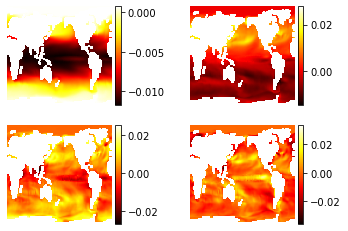

In [56]:
# Plotting the main features from SVD
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)  # reshapes 2d axes array into a 1d array (for easier indexing)
for j in range(4):
    U = np.flipud(np.reshape(u[:,j],(lenLat,lenLon)))
    U2 = U[::2,::2]  # get only every second pixel, for smaller image size
    im = axs[j].imshow(U2,cmap='hot')
    axs[j].axis('off')
    # following lines add colorbar to each subplot
    divider = make_axes_locatable(axs[j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical');

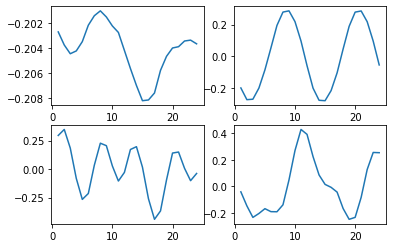

In [57]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    V = vT[j,:]
    im = axs[j].plot(range(1,len(V)+1),V)

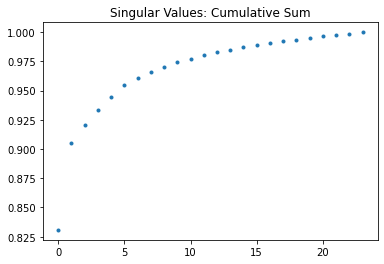

In [58]:
plt.figure()
plt.plot(np.cumsum(s)/np.sum(s),'.')
plt.title('Singular Values: Cumulative Sum')
plt.show()

#### Add your interpretation of results for task 1

The four plots are the SVD representing spatial and temporal components (features and loadings) for the sea surface in different areas over the World when land cells are removed. However, the plots depicts the temperature variation from the northern hemisphere, equator and southern hemisphere. For example, the first plot show colder temperature in the southern hemisphere (-0.01) while the second plot on the first panel shows high temperature in the northern hemisphere (0.02). The remaining two plots depict the same variation of temperature in the regions for those time period (-0.02 to +0.02)